# Causal Analysis of Player Performance in Sports

## Abstract
This notebook explores the causal relationships affecting player performance in sports. By analyzing simulated data, we investigate how factors such as training hours, rest, diet, and player position influence game performance. We employ data preparation techniques, feature encoding, exploratory data analysis, feature selection, and causal inference methods to derive meaningful insights. Visualizations, including plots and causal graphs, are provided to enhance understanding.

**Introduction**

Understanding the factors that causally affect player performance is crucial in sports analytics. This notebook aims to identify and analyze these factors using causal inference techniques. By simulating a dataset that reflects real-world scenarios, we demonstrate how data preparation, exploratory analysis, and causal modeling can provide insights into player performance.

## Theory
### Causality in Sports Performance
-Causality in Sports Performance
Causality refers to the relationship between cause and effect. In sports, understanding causal relationships is critical for making decisions that improve player performance. While correlation only indicates a statistical association between variables, causation establishes that one variable directly influences another.

Key Concepts in Causal Analysis
Causal Effect:

The change in a player's performance (effect) due to a change in one or more factors like training intensity or rest hours (cause).
Example: If training hours are increased by 5 hours per week, how much does the player's performance improve?
Intervention:

A deliberate action to change a factor to observe its effect on performance.
Example: Changing a player's diet to a high-protein regimen to assess its impact on endurance.
Counterfactuals:

Hypothetical scenarios used to determine what would have happened if a different action had been taken.
Example: If a player had not trained extra hours, how would their performance compare?
Confounders:

Variables that affect both the cause and effect, leading to biased results if not accounted for.
Example: A player's age may influence both training capacity and performance, acting as a confounder.
Causal Diagrams:

Graphical representations (e.g., directed acyclic graphs) that visually encode relationships between variables.
Example: Training Hours → Game Performance.

**Causality in Decision-Making**

Causal analysis helps coaches and sports scientists answer practical questions:

What training regimen leads to the best performance?
Does rest improve performance, or does it depend on the player's age?
How do injuries impact performance, and can they be mitigated?
By identifying causal relationships, teams can develop evidence-based strategies to optimize training and player management.

**Importance of Data Preparation**

Accurate causal analysis requires high-quality, well-prepared data. Poorly handled data can introduce biases and confound results. The following techniques are crucial:

Handling Missing Data:

Missing data can arise from incomplete training logs, dietary records, or injury reports. Imputation techniques, such as filling missing values with the mean or mode, ensure data completeness without distorting causal relationships. Encoding Categorical Variables:

Variables like player position and diet type are categorical but can influence performance. Encoding these variables numerically allows models to incorporate them into analysis. Feature Selection:

Selecting the most relevant variables (e.g., training hours, diet, injuries) simplifies the model and enhances interpretability. Example: Including irrelevant features like "favorite jersey color" may add noise to the model.

**Applications of Causal Analysis in Sports
Training Optimization:**

Understanding how training volume impacts fatigue and performance helps balance workload.
Injury Prevention:

Analyzing causal links between overtraining, rest, and injuries helps design safer regimens.
Dietary Recommendations:

Assessing the causal impact of different diets on performance informs nutrition plans.
Game Strategy:

Identifying key performance drivers helps tailor strategies to maximize team success.
Player Development:

Longitudinal causal analysis helps track progress and identify growth opportunities.


In [1]:

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For causal analysis
import networkx as nx

# For statistical tests
from scipy.stats import pearsonr

# For feature selection
from sklearn.feature_selection import SelectKBest, f_regression

# For handling missing data and encoding
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Set random seed for reproducibility
np.random.seed(42)

# Simulated dataset
num_players = 200

data = {
    'Player_ID': range(1, num_players + 1),
    'Age': np.random.randint(18, 35, num_players),
    'Training_Hours': np.random.uniform(5, 20, num_players),  # Hours of training per week
    'Rest_Hours': np.random.uniform(40, 70, num_players),      # Weekly rest hours
    'Diet_Type': np.random.choice(['High Protein', 'Balanced', 'Low Carb'], num_players),
    'Position': np.random.choice(['Forward', 'Midfielder', 'Defender', 'Goalkeeper'], num_players),
    'Experience_Years': np.random.randint(1, 15, num_players),
    'Injuries_Last_Year': np.random.randint(0, 5, num_players),
    'Game_Performance': np.random.uniform(50, 100, num_players)  # Performance score
}

df = pd.DataFrame(data)

# Introduce causal relationships
df['Game_Performance'] += df['Training_Hours'] * 1.5
df['Game_Performance'] -= df['Injuries_Last_Year'] * 2
df['Game_Performance'] += df['Experience_Years'] * 0.5
df['Game_Performance'] += np.where(df['Diet_Type'] == 'High Protein', 3, 0)
df['Game_Performance'] += np.where(df['Position'] == 'Forward', 2, 0)

# Introduce missing values
df.loc[df.sample(frac=0.1).index, 'Training_Hours'] = np.nan
df.loc[df.sample(frac=0.05).index, 'Diet_Type'] = np.nan

print("First five rows of the dataset:")
df.head()


First five rows of the dataset:


,Player_ID,Age,Training_Hours,Rest_Hours,Diet_Type,Position,Experience_Years,Injuries_Last_Year,Game_Performance
0,1,24,15.505367,56.856001,Low Carb,Goalkeeper,5,4,76.109748
1,2,32,17.699917,47.157906,High Protein,Defender,10,4,126.108307
2,3,28,17.844864,60.395343,Balanced,Defender,9,1,90.850882
3,4,25,11.067622,62.197263,High Protein,Forward,3,4,112.238022
4,5,24,18.316551,47.147085,Balanced,Goalkeeper,4,2,107.957160


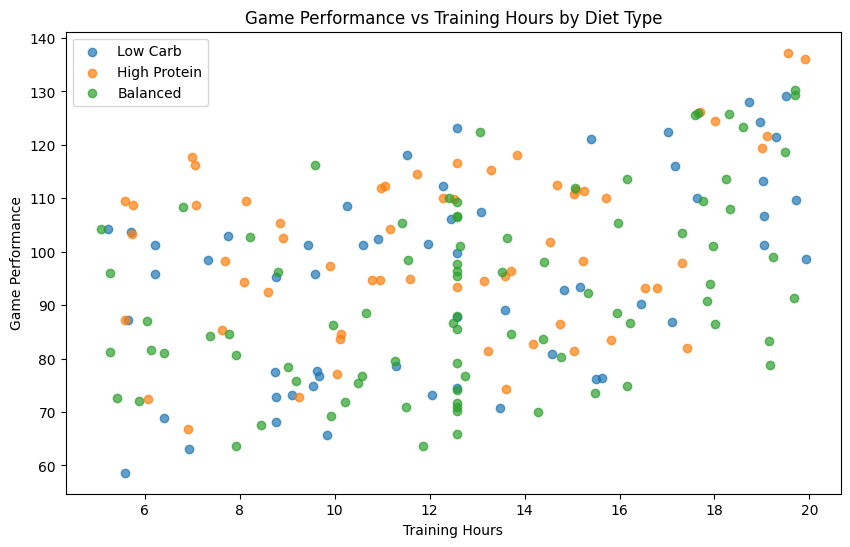

In [19]:
# @title Game Performance vs Training Hours by Diet Type

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for diet_type in df['Diet_Type'].unique():
    subset = df[df['Diet_Type'] == diet_type]
    plt.scatter(subset['Training_Hours'], subset['Game_Performance'], label=diet_type, alpha=0.7)

plt.xlabel('Training Hours')
plt.ylabel('Game Performance')
plt.title('Game Performance vs Training Hours by Diet Type')
_ = plt.legend()


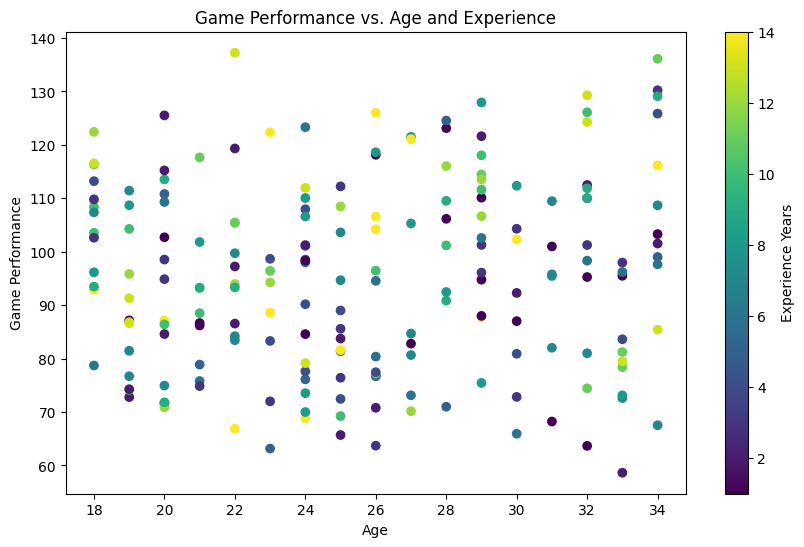

In [18]:
# @title Game Performance vs. Age and Experience

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Game_Performance'], c=df['Experience_Years'], cmap='viridis')
plt.colorbar(label='Experience Years')
plt.xlabel('Age')
plt.ylabel('Game Performance')
_ = plt.title('Game Performance vs. Age and Experience')

<ipython-input-17-f114f60a47e9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Age', y='Diet_Type', inner='stick', palette='Dark2')


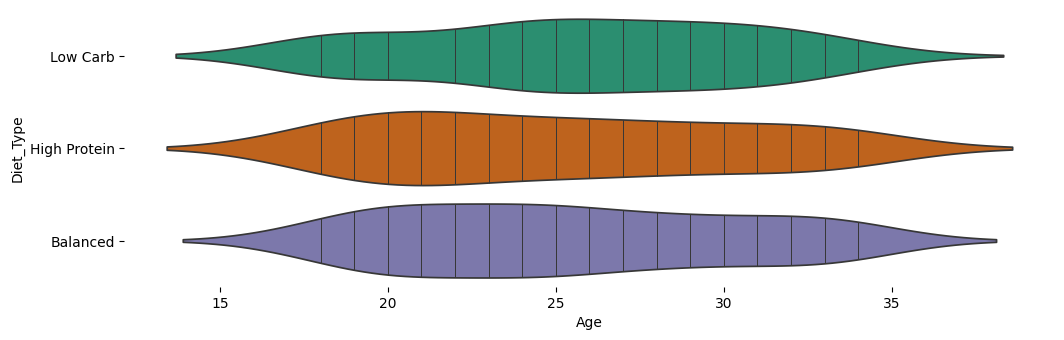

In [17]:
# @title Diet_Type vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Diet_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Diet_Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

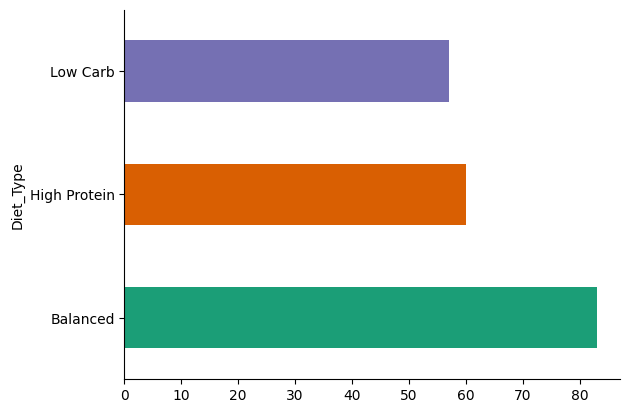

In [16]:
# @title Diet_Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Diet_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Impute missing numerical values with mean
imputer_num = SimpleImputer(strategy='mean')
df['Training_Hours'] = imputer_num.fit_transform(df[['Training_Hours']])

# Impute missing categorical values with the most frequent
imputer_cat = SimpleImputer(strategy='most_frequent')
# Reshape the output to be 1-dimensional
df['Diet_Type'] = imputer_cat.fit_transform(df[['Diet_Type']]).ravel()

print("\nData after handling missing values:")
print(df.isnull().sum())


Missing values in each column:
Player_ID              0
Age                    0
Training_Hours         0
Rest_Hours             0
Diet_Type             10
Position               0
Experience_Years       0
Injuries_Last_Year     0
Game_Performance       0
dtype: int64

Data after handling missing values:
Player_ID             0
Age                   0
Training_Hours        0
Rest_Hours            0
Diet_Type             0
Position              0
Experience_Years      0
Injuries_Last_Year    0
Game_Performance      0
dtype: int64


In [6]:
# One-Hot Encoding for Diet_Type and Position
categorical_features = ['Diet_Type', 'Position']
# Replace 'sparse' with 'sparse_output'
encoder = OneHotEncoder(sparse_output=False)  # Changed line
encoded_features = encoder.fit_transform(df[categorical_features])

# Get feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Combine with the original dataset
df_encoded = pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)

print("Data after encoding categorical variables:")
df_encoded.head()

Data after encoding categorical variables:


,Player_ID,Age,Training_Hours,Rest_Hours,Experience_Years,Injuries_Last_Year,Game_Performance,Diet_Type_Balanced,Diet_Type_High Protein,Diet_Type_Low Carb,Position_Defender,Position_Forward,Position_Goalkeeper,Position_Midfielder
0,1,24,15.505367,56.856001,5,4,76.109748,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,32,17.699917,47.157906,10,4,126.108307,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,28,17.844864,60.395343,9,1,90.850882,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,25,11.067622,62.197263,3,4,112.238022,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,24,18.316551,47.147085,4,2,107.957160,1.0,0.0,0.0,0.0,0.0,1.0,0.0


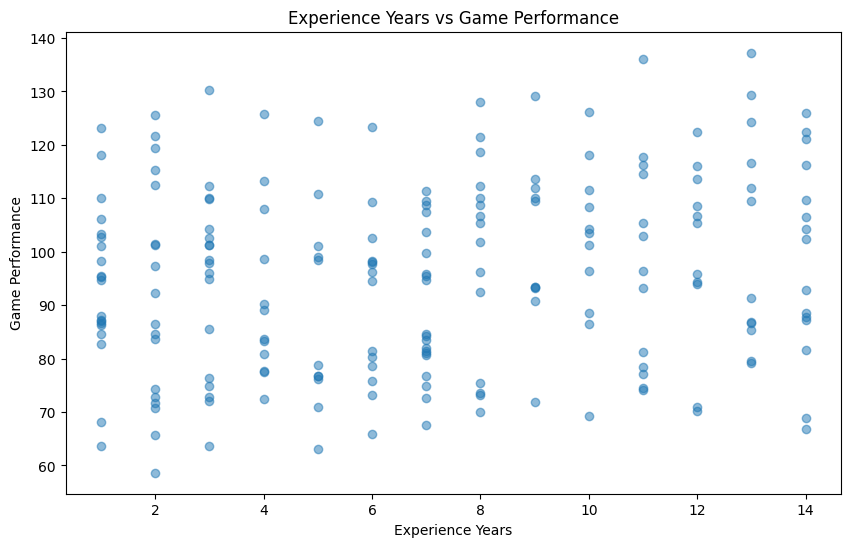

In [15]:
# @title Experience Years vs Game Performance

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['Experience_Years'], df_encoded['Game_Performance'], alpha=0.5)
plt.title('Experience Years vs Game Performance')
plt.xlabel('Experience Years')
_ = plt.ylabel('Game Performance')

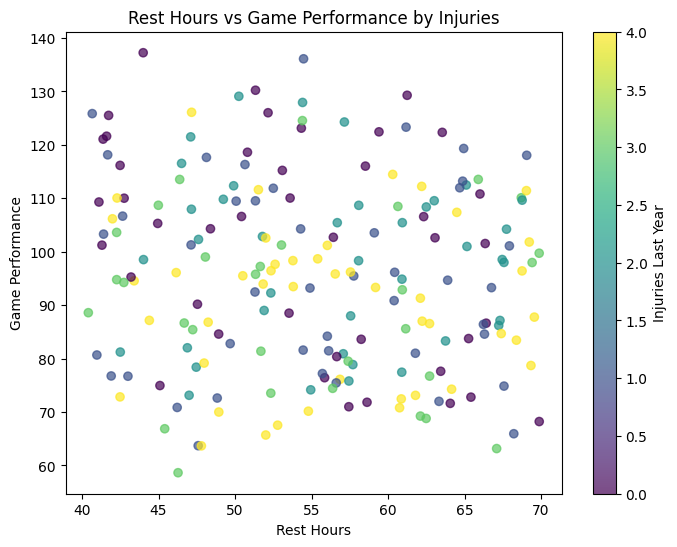

In [14]:
# @title Rest Hours vs Game Performance by Injuries

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_encoded['Rest_Hours'], df_encoded['Game_Performance'], c=df_encoded['Injuries_Last_Year'], alpha=0.7, cmap='viridis')
plt.title('Rest Hours vs Game Performance by Injuries')
plt.xlabel('Rest Hours')
plt.ylabel('Game Performance')
_ = plt.colorbar(scatter, label='Injuries Last Year')

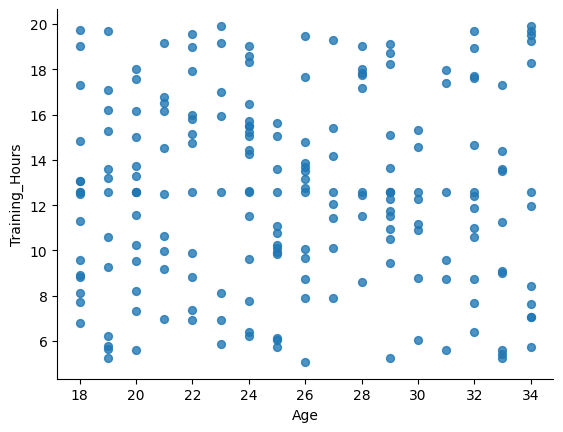

In [13]:
# @title Age vs Training_Hours

from matplotlib import pyplot as plt
df_encoded.plot(kind='scatter', x='Age', y='Training_Hours', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

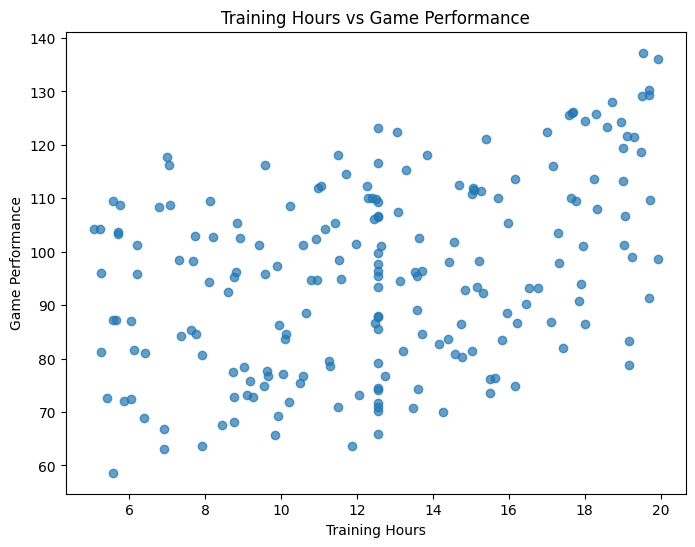

In [12]:
# @title Training Hours vs Game Performance

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_encoded['Training_Hours'], df_encoded['Game_Performance'], alpha=0.7)
plt.title('Training Hours vs Game Performance')
plt.xlabel('Training Hours')
_ = plt.ylabel('Game Performance')

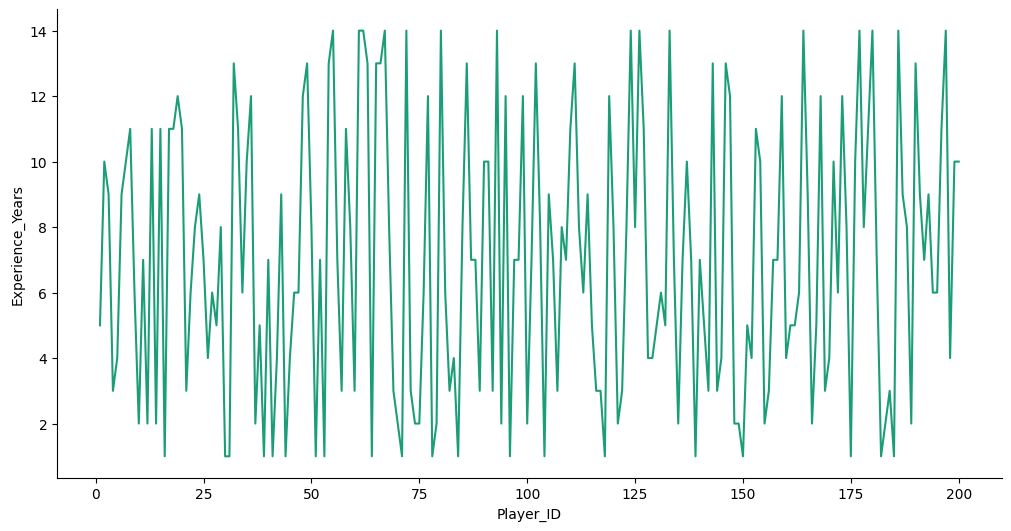

In [11]:
# @title Player_ID vs Experience_Years

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Player_ID']
  ys = series['Experience_Years']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_encoded.sort_values('Player_ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Player_ID')
_ = plt.ylabel('Experience_Years')

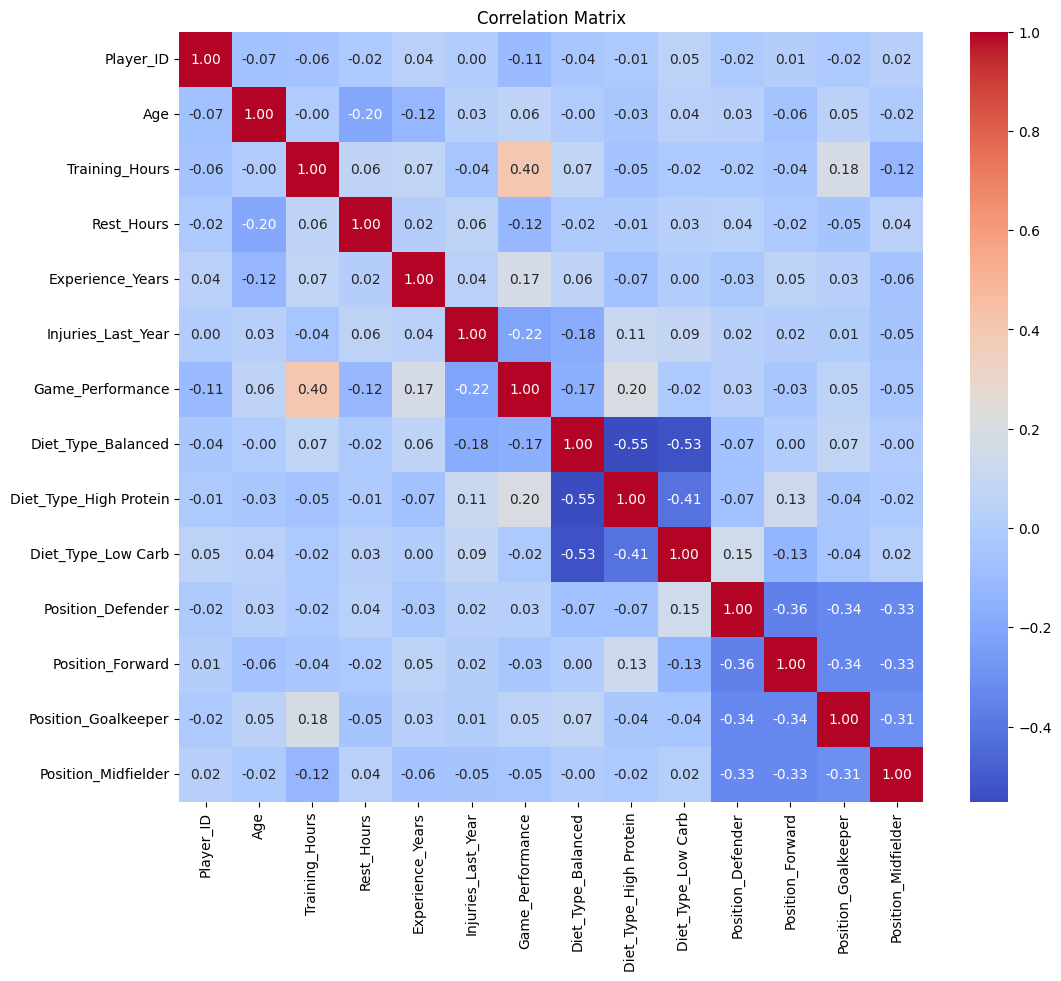

In [7]:

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


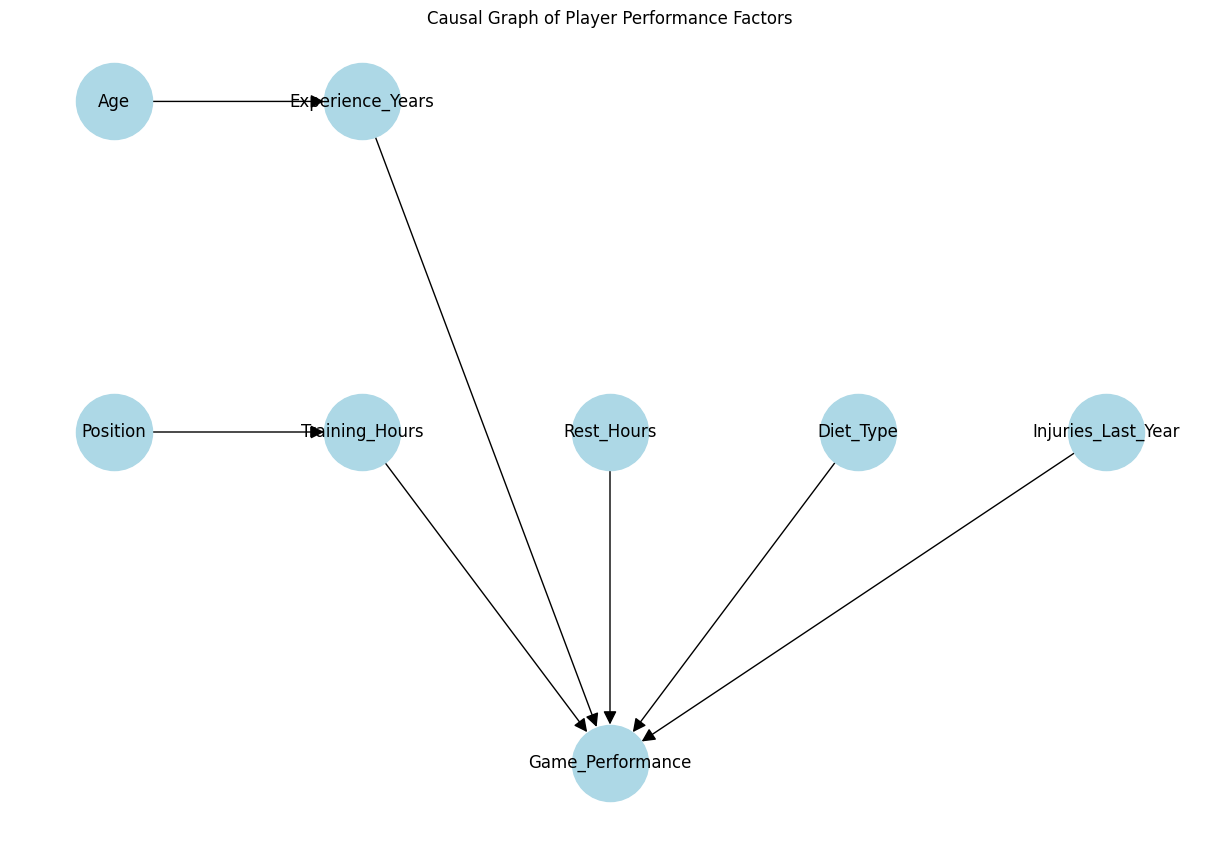

In [8]:

# Create a directed graph
G = nx.DiGraph()

# Add edges representing causal relationships
G.add_edges_from([
    ('Age', 'Experience_Years'),
    ('Experience_Years', 'Game_Performance'),
    ('Training_Hours', 'Game_Performance'),
    ('Position', 'Training_Hours'),
    ('Rest_Hours', 'Game_Performance'),
    ('Diet_Type', 'Game_Performance'),
    ('Injuries_Last_Year', 'Game_Performance')
])

# Assign positions for a better layout
pos = {
    'Age': (0, 2),
    'Experience_Years': (1, 2),
    'Position': (0, 1),
    'Training_Hours': (1, 1),
    'Rest_Hours': (2, 1),
    'Diet_Type': (3, 1),
    'Injuries_Last_Year': (4, 1),
    'Game_Performance': (2, 0)
}

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, arrowsize=20)
plt.title("Causal Graph of Player Performance Factors")
plt.show()


## Conclusion
This comprehensive analysis demonstrates how various factors causally influence player performance in sports. Through data preparation, EDA, feature selection, and causal modeling, we have identified key variables that significantly impact performance. Visualizations provided deeper insights into the relationships between variables.

## References
- Pearl, J. (2009). *Causality: Models, Reasoning, and Inference.*
- Scikit-learn Documentation: [Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)
- Seaborn Documentation: [Statistical Data Visualization](https://seaborn.pydata.org/)
- NetworkX Documentation: [Network Analysis in Python](https://networkx.org/)
- Kaggle Tutorials: [Data Visualization](https://www.kaggle.com/learn/data-visualization)

## MIT License
Copyright (c) 2024 Vivek Reddy

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.